## Лабораторна робота №4 (2 рівень)

Виконав студент групи ФІ-31 Дремко Олександр

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

Професійний Data scientist має вміти працювати з різнотипними датасетами, обробляти їх, візуалізувати та знаходити закономірності. Тому спочатку виберемо датасет із архіву
https://archive.ics.uci.edu/datasets який відповідатиме таким вимогам:
- Data Set Characteristics: Multivariate
- Attribute Characteristics: Categorical, Integer, Real
- Number of Attributes: at least 2 integers/real
- Missing Values? YES!

![AutDaSt](ad.png)

### Завантаження данних

In [76]:
file_path = "auto-mpg.txt"

Pandas

In [77]:
data_p = pd.read_csv(file_path, delim_whitespace=True, na_values=['?'], low_memory=False)
data_p

C:\Users\Dremko\AppData\Local\Temp\ipykernel_13916\1920614735.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_p = pd.read_csv(file_path, delim_whitespace=True, na_values=['?'], low_memory=False)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet_chevelle_malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick_skylark_320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth_satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc_rebel_sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford_torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford_mustang_gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw_pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge_rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford_ranger


NumPy

In [78]:
data_n = np.genfromtxt(file_path, delimiter=' ', dtype=None, names=True, encoding='utf-8', missing_values='?', filling_values=np.nan)
data_n

array([(18. , 8, 307. , 130., 3504., 12. , 70, 1, 'chevrolet_chevelle_malibu'),
       (15. , 8, 350. , 165., 3693., 11.5, 70, 1, 'buick_skylark_320'),
       (18. , 8, 318. , 150., 3436., 11. , 70, 1, 'plymouth_satellite'),
       (16. , 8, 304. , 150., 3433., 12. , 70, 1, 'amc_rebel_sst'),
       (17. , 8, 302. , 140., 3449., 10.5, 70, 1, 'ford_torino'),
       (15. , 8, 429. , 198., 4341., 10. , 70, 1, 'ford_galaxie_500'),
       (14. , 8, 454. , 220., 4354.,  9. , 70, 1, 'chevrolet_impala'),
       (14. , 8, 440. , 215., 4312.,  8.5, 70, 1, 'plymouth_fury_iii'),
       (14. , 8, 455. , 225., 4425., 10. , 70, 1, 'pontiac_catalina'),
       (15. , 8, 390. , 190., 3850.,  8.5, 70, 1, 'amc_ambassador_dpl'),
       (15. , 8, 383. , 170., 3563., 10. , 70, 1, 'dodge_challenger_se'),
       (14. , 8, 340. , 160., 3609.,  8. , 70, 1, "plymouth_'cuda_340"),
       (15. , 8, 400. , 150., 3761.,  9.5, 70, 1, 'chevrolet_monte_carlo'),
       (14. , 8, 455. , 225., 3086., 10. , 70, 1, 'buick_est

### Завдання 1

У вашому наборі даних обов’язково наявні пропущені дані. Вам необхідно поборотися з ними двома способами - прибрати їх, або замінити на інше значення. Якщо з першим все досить просто, то другий спосіб можна реалізувати багатьма способами: заміна пропущених значень на останнє спостереження перед ними, заміна на статистичні показники (mean, median, mode), або спрогнозувати значення за допомогою інтерполяції

1. Прибераємо пропущені данні

Pandas

In [79]:
data_p_wo_ld = data_p.dropna()

data_p_wo_ld

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet_chevelle_malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick_skylark_320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth_satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc_rebel_sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford_torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford_mustang_gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw_pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge_rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford_ranger


NumPy

In [101]:
mask = ~np.isnan(data_n['mpg']) & ~np.isnan(data_n['cylinders']) & \
       ~np.isnan(data_n['displacement']) & ~np.isnan(data_n['horsepower']) & \
       ~np.isnan(data_n['weight']) & ~np.isnan(data_n['acceleration']) & \
       ~np.isnan(data_n['model_year']) & ~np.isnan(data_n['origin'])

data_n_wo_ld = data_n[mask]

print("Rows:", len(data_n_wo_ld))
data_n_wo_ld

Rows: 392


array([(18. , 8, 307. , 130., 3504., 12. , 70, 1, 'chevrolet_chevelle_malibu'),
       (15. , 8, 350. , 165., 3693., 11.5, 70, 1, 'buick_skylark_320'),
       (18. , 8, 318. , 150., 3436., 11. , 70, 1, 'plymouth_satellite'),
       (16. , 8, 304. , 150., 3433., 12. , 70, 1, 'amc_rebel_sst'),
       (17. , 8, 302. , 140., 3449., 10.5, 70, 1, 'ford_torino'),
       (15. , 8, 429. , 198., 4341., 10. , 70, 1, 'ford_galaxie_500'),
       (14. , 8, 454. , 220., 4354.,  9. , 70, 1, 'chevrolet_impala'),
       (14. , 8, 440. , 215., 4312.,  8.5, 70, 1, 'plymouth_fury_iii'),
       (14. , 8, 455. , 225., 4425., 10. , 70, 1, 'pontiac_catalina'),
       (15. , 8, 390. , 190., 3850.,  8.5, 70, 1, 'amc_ambassador_dpl'),
       (15. , 8, 383. , 170., 3563., 10. , 70, 1, 'dodge_challenger_se'),
       (14. , 8, 340. , 160., 3609.,  8. , 70, 1, "plymouth_'cuda_340"),
       (15. , 8, 400. , 150., 3761.,  9.5, 70, 1, 'chevrolet_monte_carlo'),
       (14. , 8, 455. , 225., 3086., 10. , 70, 1, 'buick_est

2. Замінюємо пропущені данні

In [81]:
columns_with_na = data_p.columns[data_p.isnull().any()].tolist()
print("Стовпчики з пропущеними даними:", columns_with_na)

Стовпчики з пропущеними даними: ['horsepower']


Pandas

In [82]:
data_p_inpltd = data_p.interpolate()

data_p.iloc[329:338]

C:\Users\Dremko\AppData\Local\Temp\ipykernel_13916\3379361066.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data_p_inpltd = data_p.interpolate()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
329,44.6,4,91.0,67.0,1850.0,13.8,80,3,honda_civic_1500_gl
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault_lecar_deluxe
331,33.8,4,97.0,67.0,2145.0,18.0,80,3,subaru_dl
332,29.8,4,89.0,62.0,1845.0,15.3,80,2,vokswagen_rabbit
333,32.7,6,168.0,132.0,2910.0,11.4,80,3,datsun_280-zx
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda_rx-7_gs
335,35.0,4,122.0,88.0,2500.0,15.1,80,2,triumph_tr7_coupe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford_mustang_cobra
337,32.4,4,107.0,72.0,2290.0,17.0,80,3,honda_accord


In [83]:
data_p_inpltd.iloc[329:338]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
329,44.6,4,91.0,67.0,1850.0,13.8,80,3,honda_civic_1500_gl
330,40.9,4,85.0,67.0,1835.0,17.3,80,2,renault_lecar_deluxe
331,33.8,4,97.0,67.0,2145.0,18.0,80,3,subaru_dl
332,29.8,4,89.0,62.0,1845.0,15.3,80,2,vokswagen_rabbit
333,32.7,6,168.0,132.0,2910.0,11.4,80,3,datsun_280-zx
334,23.7,3,70.0,100.0,2420.0,12.5,80,3,mazda_rx-7_gs
335,35.0,4,122.0,88.0,2500.0,15.1,80,2,triumph_tr7_coupe
336,23.6,4,140.0,80.0,2905.0,14.3,80,1,ford_mustang_cobra
337,32.4,4,107.0,72.0,2290.0,17.0,80,3,honda_accord


NumPy

In [102]:
def replace_nan(arr, columns):
    for col in columns:
        for i in range(1, len(arr)):
            if np.isnan(arr[col][i]): arr[col][i] = arr[col][i - 1]

data_n_womd = np.copy(data_n)
replace_nan(data_n_womd, ['horsepower'])

print(data_n[329:338])

[(44.6, 4,  91.,  67., 1850., 13.8, 80, 3, 'honda_civic_1500_gl')
 (40.9, 4,  85.,  nan, 1835., 17.3, 80, 2, 'renault_lecar_deluxe')
 (33.8, 4,  97.,  67., 2145., 18. , 80, 3, 'subaru_dl')
 (29.8, 4,  89.,  62., 1845., 15.3, 80, 2, 'vokswagen_rabbit')
 (32.7, 6, 168., 132., 2910., 11.4, 80, 3, 'datsun_280-zx')
 (23.7, 3,  70., 100., 2420., 12.5, 80, 3, 'mazda_rx-7_gs')
 (35. , 4, 122.,  88., 2500., 15.1, 80, 2, 'triumph_tr7_coupe')
 (23.6, 4, 140.,  nan, 2905., 14.3, 80, 1, 'ford_mustang_cobra')
 (32.4, 4, 107.,  72., 2290., 17. , 80, 3, 'honda_accord')]


In [103]:
print(data_n_womd[329:338])

[(44.6, 4,  91.,  67., 1850., 13.8, 80, 3, 'honda_civic_1500_gl')
 (40.9, 4,  85.,  67., 1835., 17.3, 80, 2, 'renault_lecar_deluxe')
 (33.8, 4,  97.,  67., 2145., 18. , 80, 3, 'subaru_dl')
 (29.8, 4,  89.,  62., 1845., 15.3, 80, 2, 'vokswagen_rabbit')
 (32.7, 6, 168., 132., 2910., 11.4, 80, 3, 'datsun_280-zx')
 (23.7, 3,  70., 100., 2420., 12.5, 80, 3, 'mazda_rx-7_gs')
 (35. , 4, 122.,  88., 2500., 15.1, 80, 2, 'triumph_tr7_coupe')
 (23.6, 4, 140.,  88., 2905., 14.3, 80, 1, 'ford_mustang_cobra')
 (32.4, 4, 107.,  72., 2290., 17. , 80, 3, 'honda_accord')]


### Завдання 2

Пронормувати вибраний датасет або стандартизувати його (нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing)

Pandas

In [104]:
def p_normalize_column(df, column):
    df_copy = df.copy()
    min_val = df_copy[column].min()
    max_val = df_copy[column].max()
    df_copy[column + '_normalized'] = (df_copy[column] - min_val) / (max_val - min_val)
    return df_copy

data_p_norm = p_normalize_column(data_p_inpltd, 'acceleration')

data_p_norm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,acceleration_normalized
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet_chevelle_malibu,0.238095
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick_skylark_320,0.208333
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth_satellite,0.178571
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc_rebel_sst,0.238095
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford_torino,0.148810
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford_mustang_gl,0.452381
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw_pickup,0.988095
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge_rampage,0.214286
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford_ranger,0.630952


In [105]:
def p_standardize_column(df, column):
    df_copy = df.copy()
    mean_val = df_copy[column].mean()
    std_val = df_copy[column].std()
    df_copy[column + '_standardized'] = (df_copy[column] - mean_val) / std_val
    return df_copy

data_p_std = p_standardize_column(data_p_inpltd, 'acceleration')

data_p_std

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,acceleration_standardized
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet_chevelle_malibu,-1.293870
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick_skylark_320,-1.475181
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth_satellite,-1.656492
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc_rebel_sst,-1.293870
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford_torino,-1.837804
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford_mustang_gl,0.011571
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw_pickup,3.275173
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge_rampage,-1.438919
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford_ranger,1.099439


NumPy

In [88]:

def n_normalize_column(arr, column):
    arr_copy = np.copy(arr)
    min_val = np.nanmin(arr_copy[column])
    max_val = np.nanmax(arr_copy[column])
    arr_copy[column] = (arr_copy[column] - min_val) / (max_val - min_val)
    return arr_copy

data_n_norm = n_normalize_column(data_n_womd, 'acceleration')

data_n_norm

array([(18. , 8, 307. , 130., 3504., 0.23809524, 70, 1, 'chevrolet_chevelle_malibu'),
       (15. , 8, 350. , 165., 3693., 0.20833333, 70, 1, 'buick_skylark_320'),
       (18. , 8, 318. , 150., 3436., 0.17857143, 70, 1, 'plymouth_satellite'),
       (16. , 8, 304. , 150., 3433., 0.23809524, 70, 1, 'amc_rebel_sst'),
       (17. , 8, 302. , 140., 3449., 0.14880952, 70, 1, 'ford_torino'),
       (15. , 8, 429. , 198., 4341., 0.11904762, 70, 1, 'ford_galaxie_500'),
       (14. , 8, 454. , 220., 4354., 0.05952381, 70, 1, 'chevrolet_impala'),
       (14. , 8, 440. , 215., 4312., 0.0297619 , 70, 1, 'plymouth_fury_iii'),
       (14. , 8, 455. , 225., 4425., 0.11904762, 70, 1, 'pontiac_catalina'),
       (15. , 8, 390. , 190., 3850., 0.0297619 , 70, 1, 'amc_ambassador_dpl'),
       (15. , 8, 383. , 170., 3563., 0.11904762, 70, 1, 'dodge_challenger_se'),
       (14. , 8, 340. , 160., 3609., 0.        , 70, 1, "plymouth_'cuda_340"),
       (15. , 8, 400. , 150., 3761., 0.08928571, 70, 1, 'chevrol

In [89]:
def n_standardize_column(array, column):
    array_copy = np.copy(array)
    mean_val = np.nanmean(array_copy[column])
    std_val = np.nanstd(array_copy[column])
    array_copy[column] = (array_copy[column] - mean_val) / std_val
    return array_copy

data_n_std = n_standardize_column(data_n_womd, 'acceleration')

data_n_std

array([(18. , 8, 307. , 130., 3504., -1.29549834, 70, 1, 'chevrolet_chevelle_malibu'),
       (15. , 8, 350. , 165., 3693., -1.47703779, 70, 1, 'buick_skylark_320'),
       (18. , 8, 318. , 150., 3436., -1.65857724, 70, 1, 'plymouth_satellite'),
       (16. , 8, 304. , 150., 3433., -1.29549834, 70, 1, 'amc_rebel_sst'),
       (17. , 8, 302. , 140., 3449., -1.84011669, 70, 1, 'ford_torino'),
       (15. , 8, 429. , 198., 4341., -2.02165614, 70, 1, 'ford_galaxie_500'),
       (14. , 8, 454. , 220., 4354., -2.38473503, 70, 1, 'chevrolet_impala'),
       (14. , 8, 440. , 215., 4312., -2.56627448, 70, 1, 'plymouth_fury_iii'),
       (14. , 8, 455. , 225., 4425., -2.02165614, 70, 1, 'pontiac_catalina'),
       (15. , 8, 390. , 190., 3850., -2.56627448, 70, 1, 'amc_ambassador_dpl'),
       (15. , 8, 383. , 170., 3563., -2.02165614, 70, 1, 'dodge_challenger_se'),
       (14. , 8, 340. , 160., 3609., -2.74781393, 70, 1, "plymouth_'cuda_340"),
       (15. , 8, 400. , 150., 3761., -2.20319559, 70

### Завдання 3

Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

Pandas

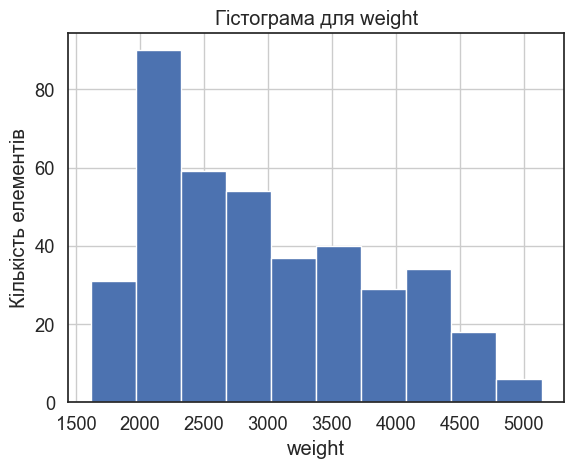

In [90]:
column = 'weight'

plt.hist(data_p_inpltd[column], bins=10)
plt.title(f'Гістограма для {column}')
plt.xlabel(column)
plt.ylabel('Кількість елементів')
plt.grid()
plt.show()

NumPy

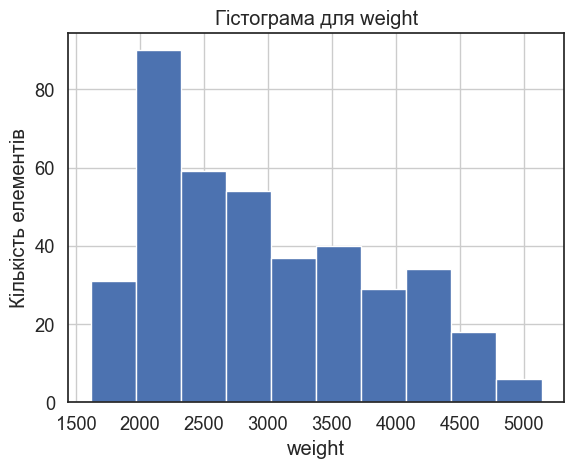

In [91]:
column = 'weight'

plt.hist(data_n_womd[column], bins=10)
plt.title(f'Гістограма для {column}')
plt.xlabel(column)
plt.ylabel('Кількість елементів')
plt.grid()
plt.show()

### Завдання 4

Збудувати графік залежності одного integer/real атрибута від іншого.

Pandas

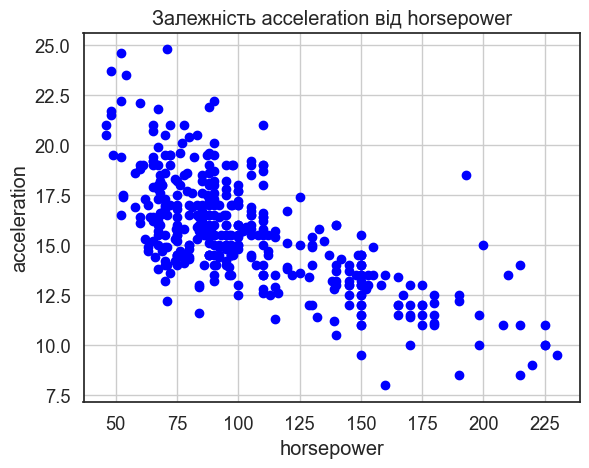

In [92]:
x_column = 'horsepower'
y_column = 'acceleration'

plt.scatter(data_p_inpltd[x_column], data_p_inpltd[y_column], color='blue')
plt.title(f'Залежність {y_column} від {x_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid()
plt.show()

NumPy

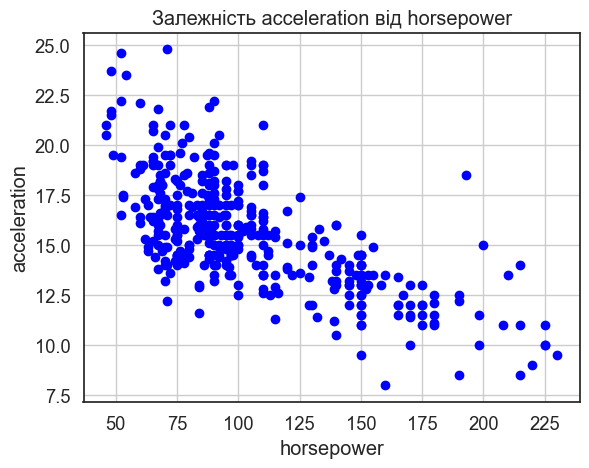

In [106]:
x_column = 'horsepower'
y_column = 'acceleration'

plt.scatter(data_n_womd[x_column], data_n_womd[y_column], color='blue')
plt.title(f'Залежність {y_column} від {x_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid()
plt.show()

### Завдання 5

Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real атрибутів.

Pandas

In [107]:
pearson_cf_p, _ = pearsonr(data_p_inpltd['horsepower'], data_p_inpltd['acceleration'])
spearman_cf_p, _ = spearmanr(data_p_inpltd['horsepower'], data_p_inpltd['acceleration'])

print(f"Коефіцієнт Пірсона: {pearson_cf_p:.3f}")
print(f"Коефіцієнт Спірмена: {spearman_cf_p:.3f}")

Коефіцієнт Пірсона: -0.687
Коефіцієнт Спірмена: -0.651


NumPy

In [108]:
pearson_cf_n, _ = pearsonr(data_n_womd['horsepower'], data_n_womd['acceleration'])
spearman_cf_n, _ = spearmanr(data_n_womd['horsepower'], data_n_womd['acceleration'])

print(f"Коефіцієнт Пірсона: {pearson_cf_n:.3f}")
print(f"Коефіцієнт Спірмена: {spearman_cf_n:.3f}")

Коефіцієнт Пірсона: -0.686
Коефіцієнт Спірмена: -0.652


### Завдання 6

Провести One Hot Encoding категоріального string атрибуту.

In [109]:
unique_cylinders = data_p_inpltd['cylinders'].unique()
print("Унікальні значення колонки 'cylinders':")
print(unique_cylinders)

Унікальні значення колонки 'cylinders':
[8 4 6 3 5]


Pandas

In [110]:
data_p_ohe = data_p_inpltd.copy()

encoder = OneHotEncoder(sparse_output=False)

cylinders_encoded = encoder.fit_transform(data_p_ohe[['cylinders']]).astype(bool)

cylinder_columns = [f'cylinder_{int(category)}' for category in encoder.categories_[0]]

data_p_ohe = pd.concat([data_p_ohe, pd.DataFrame(cylinders_encoded, columns=cylinder_columns)], axis=1)

data_p_ohe

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,cylinder_3,cylinder_4,cylinder_5,cylinder_6,cylinder_8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet_chevelle_malibu,False,False,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick_skylark_320,False,False,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth_satellite,False,False,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc_rebel_sst,False,False,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford_torino,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford_mustang_gl,False,True,False,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw_pickup,False,True,False,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge_rampage,False,True,False,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford_ranger,False,True,False,False,False


NumPy

In [111]:
data_n_ohe = data_n.copy()

encoder = OneHotEncoder(sparse_output=False)

cylinders = data_n_ohe['cylinders'].reshape(-1, 1)

cylinders_encoded = encoder.fit_transform(cylinders)

cylinder_columns = [f'cylinder_{int(category)}' for category in encoder.categories_[0]]

new_dtype = data_n_ohe.dtype.descr + [(col, np.bool_) for col in cylinder_columns]

data_n_ohe_expanded = np.zeros(data_n_ohe.shape[0], dtype=new_dtype)

for name in data_n_ohe.dtype.names:
    data_n_ohe_expanded[name] = data_n_ohe[name]

for i, col in enumerate(cylinder_columns):
    data_n_ohe_expanded[col] = cylinders_encoded[:, i].astype(np.bool_)


data_n_ohe_expanded

array([(18. , 8, 307. , 130., 3504., 12. , 70, 1, 'chevrolet_chevelle_malibu', False, False, False, False,  True),
       (15. , 8, 350. , 165., 3693., 11.5, 70, 1, 'buick_skylark_320', False, False, False, False,  True),
       (18. , 8, 318. , 150., 3436., 11. , 70, 1, 'plymouth_satellite', False, False, False, False,  True),
       (16. , 8, 304. , 150., 3433., 12. , 70, 1, 'amc_rebel_sst', False, False, False, False,  True),
       (17. , 8, 302. , 140., 3449., 10.5, 70, 1, 'ford_torino', False, False, False, False,  True),
       (15. , 8, 429. , 198., 4341., 10. , 70, 1, 'ford_galaxie_500', False, False, False, False,  True),
       (14. , 8, 454. , 220., 4354.,  9. , 70, 1, 'chevrolet_impala', False, False, False, False,  True),
       (14. , 8, 440. , 215., 4312.,  8.5, 70, 1, 'plymouth_fury_iii', False, False, False, False,  True),
       (14. , 8, 455. , 225., 4425., 10. , 70, 1, 'pontiac_catalina', False, False, False, False,  True),
       (15. , 8, 390. , 190., 3850.,  8.5

### Завдання 7

Провести візуалізацію багатовимірних даних, використовуючи приклади, наведені у медіумі https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

Pandas

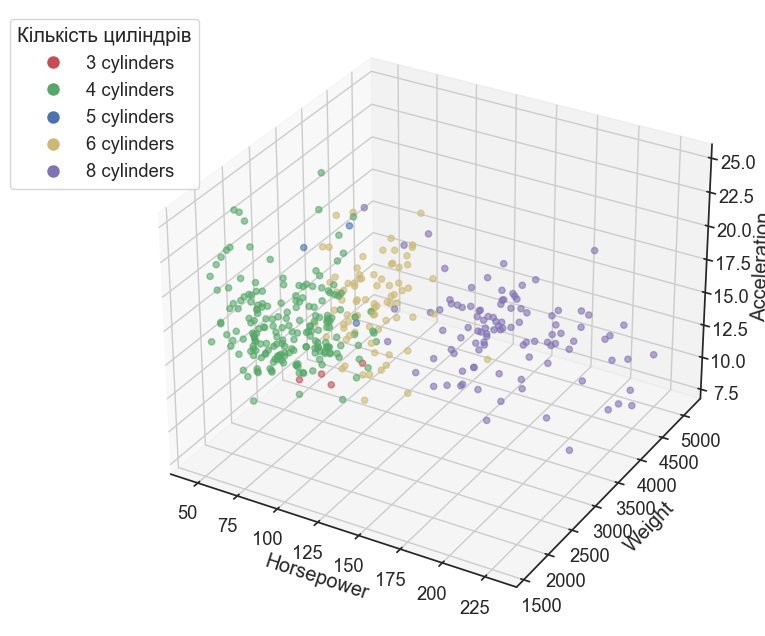

In [112]:
colors = {3: 'r', 4: 'g', 5: 'b', 6: 'y', 8: 'm'}
cylinder_colors = data_p['cylinders'].apply(lambda x: colors[x])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data_p['horsepower'], data_p['weight'], data_p['acceleration'], c=cylinder_colors, alpha=0.6)

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Acceleration')

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=f'{key} cylinders', markersize=10, markerfacecolor=color) for key, color in colors.items()]
ax.legend(handles=legend_labels, title='Кількість циліндрів', loc='upper left', bbox_to_anchor=(-0.2, 1))

plt.show()

NumPy

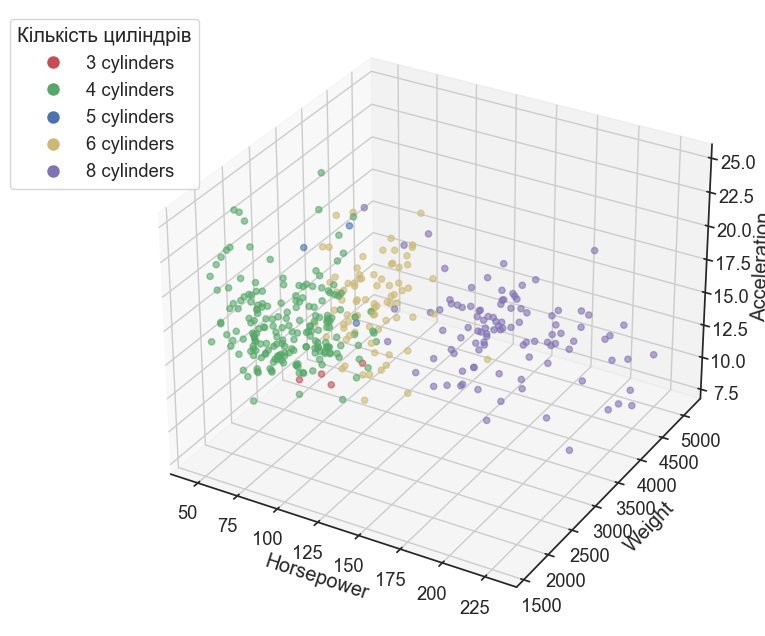

In [113]:
colors = {3: 'r', 4: 'g', 5: 'b', 6: 'y', 8: 'm'}
cylinder_colors = np.vectorize(colors.get)(data_n['cylinders'])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(data_n['horsepower'], data_n['weight'], data_n['acceleration'], c=cylinder_colors, alpha=0.6)

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Acceleration')

legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=f'{key} cylinders', markersize=10, markerfacecolor=color) for key, color in colors.items()]
ax.legend(handles=legend_labels, title='Кількість циліндрів', loc='upper left', bbox_to_anchor=(-0.2, 1))

plt.show()